# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city  
    
    # Only make the API call for each city once
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
     # Add 1 to the record count
    record_count += 1
    try:
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # Append latitude and temperature to their respective lists
        lat.append(city_lat)
        temp.append(city_max_temp)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
   

    
   
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 3 of Set 1 | ahuimanu
City not found. Skipping...
Processing Record 4 of Set 1 | kuhestan
City not found. Skipping...
Processing Record 5 of Set 1 | chuy
City not found. Skipping...
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | albany
City not found. Skipping...
Processing Record 8 of Set 1 | butaritari
City not found. Skipping...
Processing Record 9 of Set 1 | doha
City not found. Skipping...
Processing Record 10 of Set 1 | chandler
City not found. Skipping...
Processing Record 11 of Set 1 | bandar-e lengeh
City not found. Skipping...
Processing Record 12 of Set 1 | tiksi
City not found. Skipping...
Processing Record 13 of Set 1 | sendai
City not found. Skipping...
Processing Record 14 of Set 1 | bluff
City not found.

In [3]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [4]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,velikiy ustyug,60.7644,46.3106,53.64,38,79,4.36,RU,1683029959
1,necochea,-38.5473,-58.7368,48.25,54,4,7.23,AR,1683030103
2,gat,31.6100,34.7642,78.40,28,0,14.76,IL,1683030103
3,umea,63.8284,20.2597,48.13,37,20,13.80,SE,1683030103
4,raudeberg,61.9875,5.1352,45.95,71,100,2.89,NO,1683030104


In [5]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/nigan/cities1.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/nigan/cities1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,velikiy ustyug,60.7644,46.3106,53.64,38,79,4.36,RU,1683029959
1,necochea,-38.5473,-58.7368,48.25,54,4,7.23,AR,1683030103
2,gat,31.6100,34.7642,78.40,28,0,14.76,IL,1683030103
3,umea,63.8284,20.2597,48.13,37,20,13.80,SE,1683030103
4,raudeberg,61.9875,5.1352,45.95,71,100,2.89,NO,1683030104


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

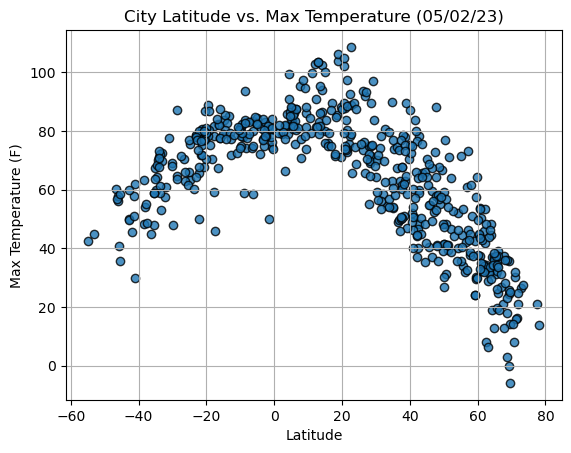

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Set title and labels
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/nigan/python-api-challenge/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

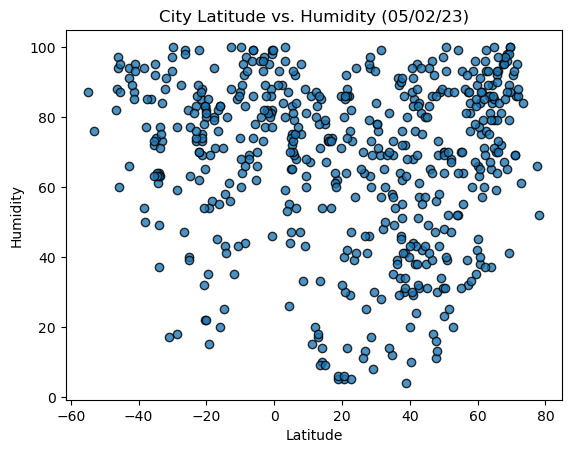

In [8]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("C:/Users/nigan/python-api-challenge/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

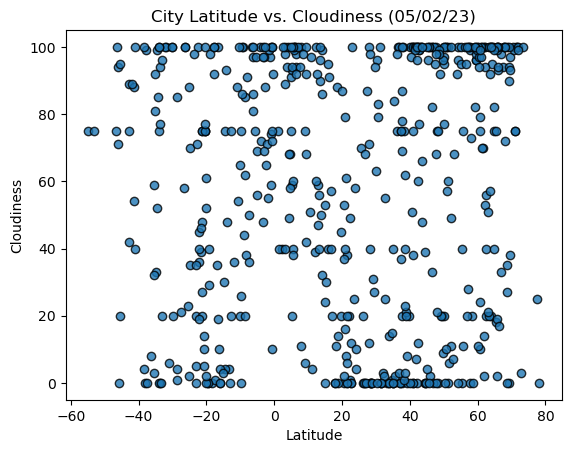

In [9]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("C:/Users/nigan/python-api-challenge/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

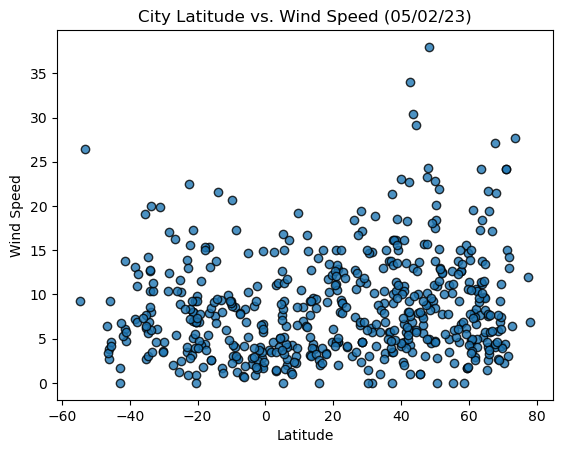

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("C:/Users/nigan/python-api-challenge/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [11]:
# Define a function to create Linear Regression plots
def scatter_with_regression(x, y):
    # Calculate regression line
    slope, intercept = np.polyfit(x, y, 1)
    regression_line = slope * x + intercept

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,velikiy ustyug,60.7644,46.3106,53.64,38,79,4.36,RU,1683029959
2,gat,31.6100,34.7642,78.40,28,0,14.76,IL,1683030103
3,umea,63.8284,20.2597,48.13,37,20,13.80,SE,1683030103
4,raudeberg,61.9875,5.1352,45.95,71,100,2.89,NO,1683030104
5,winslow,35.0242,-110.6974,53.78,35,0,10.36,US,1683030104


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,necochea,-38.5473,-58.7368,48.25,54,4,7.23,AR,1683030103
6,cape town,-33.9258,18.4232,71.11,64,75,10.36,ZA,1683029849
7,bluff,-46.6000,168.3333,60.37,82,75,6.49,NZ,1683030104
8,mahebourg,-20.4081,57.7000,79.09,83,75,6.91,MU,1683030104
12,ushuaia,-54.8000,-68.3000,42.42,87,75,9.22,AR,1683029826


###  Temperature vs. Latitude Linear Regression Plot

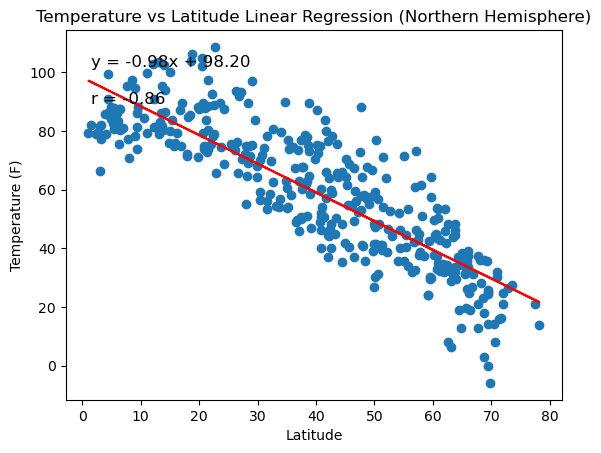

In [14]:
# Linear regression on Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Extract relevant columns from Northern Hemisphere DataFrame
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

# Perform linear regression on Northern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x, y)
regression_line = slope * x + intercept
ax.plot(x, regression_line, color='red')

# Set plot title and labels
ax.set_title('Temperature vs Latitude Linear Regression (Northern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Temperature (F)')

# Add regression line formula to the plot
model_formula = f"y = {slope:.2f}x + {intercept:.2f}"
ax.annotate(model_formula, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

# Add r-value to the plot
r_value = f"r = {rvalue:.2f}"
ax.annotate(r_value, xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)

# Show plot
plt.show()


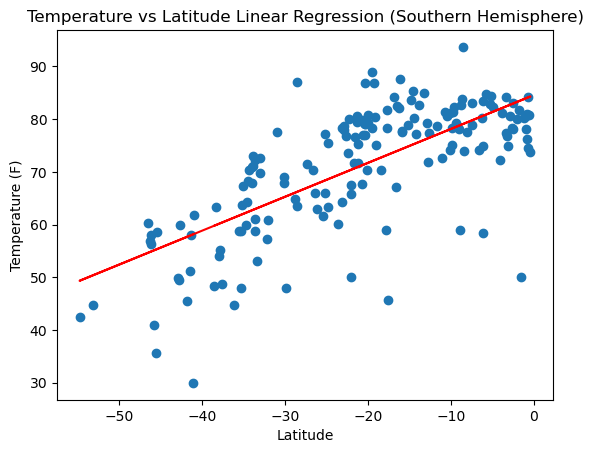

In [15]:
# Linear regression on Southern Hemisphere

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Define variables for x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Temperature vs Latitude Linear Regression (Southern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Temperature (F)')

# Show plot
plt.show()


**Discussion about the linear relationship:** The lower the latitude the higher the temp in the northern hemisphere. It provides a strong R squared. The southern hemishpere shows the higher the latitude the higher the temp goes.

### Humidity vs. Latitude Linear Regression Plot

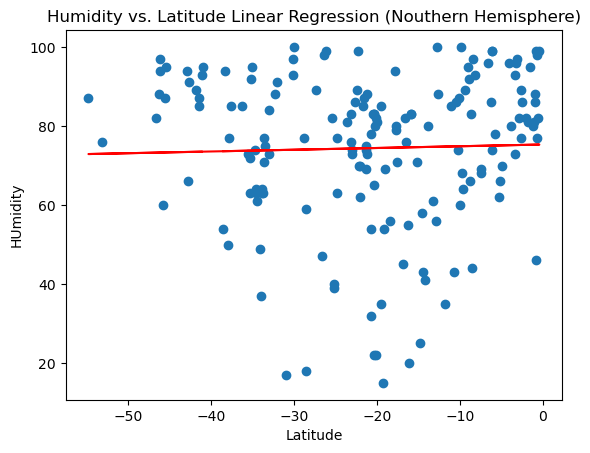

In [16]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Define variables for x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Humidity vs. Latitude Linear Regression (Nouthern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('HUmidity')

# Show plot
plt.show()

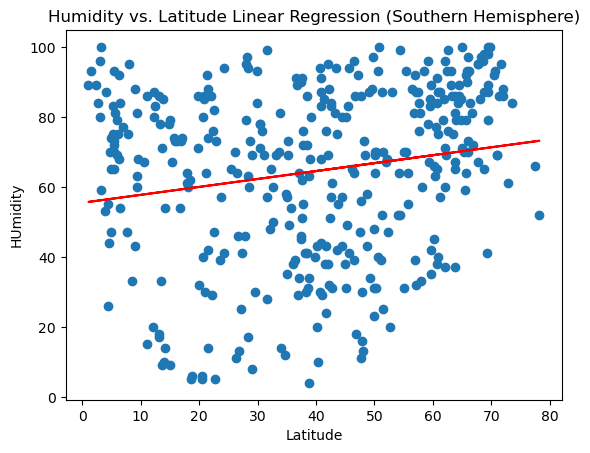

In [17]:
# Southern Hemisphere
southern_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Define variables for x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Humidity vs. Latitude Linear Regression (Southern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('HUmidity')

# Show plot
plt.show()

**Discussion about the linear relationship:** Northern hemisphere shows higher humidity is spread out across most latitudes where in the southern hemisphere highest humidity looks like thy happen at the middle or top half of latitudes.  

### Cloudiness vs. Latitude Linear Regression Plot

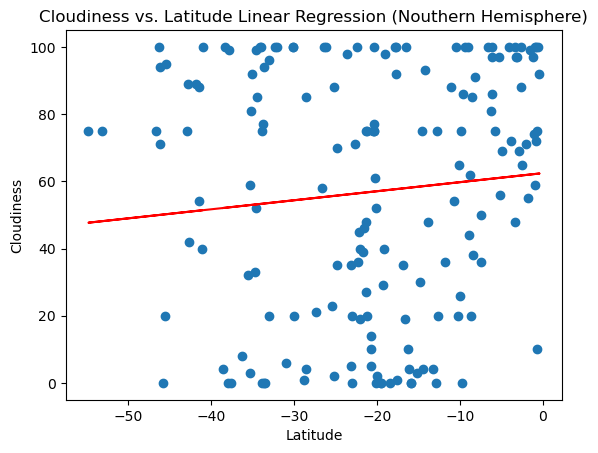

In [18]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Define variables for x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Cloudiness vs. Latitude Linear Regression (Nouthern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness')

# Show plot
plt.show()

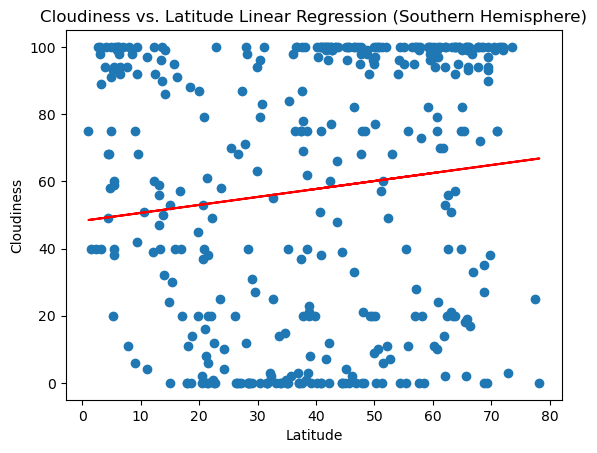

In [19]:
# Southern Hemisphere
southern_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Define variables for x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Cloudiness vs. Latitude Linear Regression (Southern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness')

# Show plot
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere higher cloudiness clusters happen close to 0 latitude. I cannot make a relationship on the siuthern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

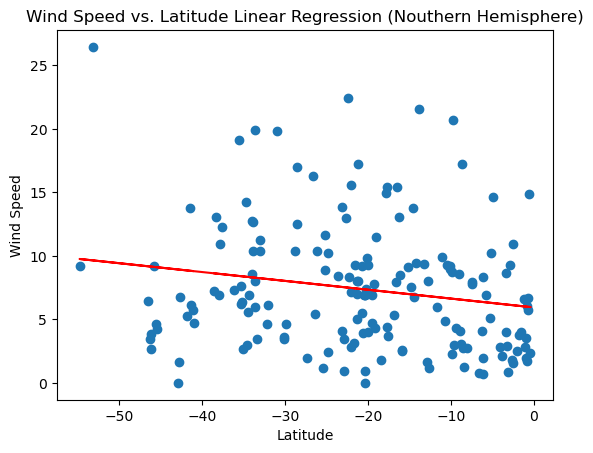

In [20]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Define variables for x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Wind Speed vs. Latitude Linear Regression (Nouthern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed')

# Show plot
plt.show()

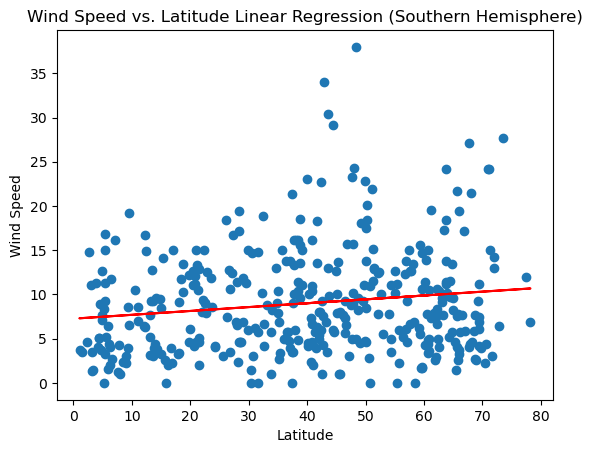

In [21]:
# Southern Hemisphere
southern_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Define variables for x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Wind Speed vs. Latitude Linear Regression (Southern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed')

# Show plot
plt.show()

**Discussion about the linear relationship:** It does not apprear to have ay type of relationship as wind speed is happening roughly the same through all latitudes.
In the northern hemisphere it looks like the closer to 0 latitude lower wind speeds are happening. 